In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load TCS and INFOSYS stock data

df_tcs = pd.read_csv("/content/drive/MyDrive/TCS.csv")

df_infosys = pd.read_csv("/content/drive/MyDrive/INFY.csv")


# Convert the 'Date' column to datetime format and set it as the index for time series analysis

df_tcs['Date'] = pd.to_datetime(df_tcs['Date'])
df_tcs.set_index('Date', inplace=True)

df_infosys['Date'] = pd.to_datetime(df_infosys['Date'])
df_infosys.set_index('Date', inplace=True)

# Drop Trades column

df_tcs = df_tcs.drop(columns = ['Trades'])


df_infosys = df_infosys.drop(columns = ['Trades'])

# Check missing values before filling
print("Missing values before filling:")
print(df_infosys[['Deliverable Volume', '%Deliverble']].isna().sum())

# Fill using forward fill
df_infosys['Deliverable Volume'] = df_infosys['Deliverable Volume'].fillna(method='ffill')
df_infosys['%Deliverble'] = df_infosys['%Deliverble'].fillna(method='ffill')

# Fill using backward fill
df_infosys['Deliverable Volume'] = df_infosys['Deliverable Volume'].fillna(method='bfill')
df_infosys['%Deliverble'] = df_infosys['%Deliverble'].fillna(method='bfill')

# Final check
print("\nMissing values after filling:")
print(df_infosys[['Deliverable Volume', '%Deliverble']].isna().sum())

Missing values before filling:
Deliverable Volume    509
%Deliverble           509
dtype: int64

Missing values after filling:
Deliverable Volume    0
%Deliverble           0
dtype: int64


<ipython-input-5-7ef40c079a31>:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_infosys['Deliverable Volume'] = df_infosys['Deliverable Volume'].fillna(method='ffill')
<ipython-input-5-7ef40c079a31>:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_infosys['%Deliverble'] = df_infosys['%Deliverble'].fillna(method='ffill')
<ipython-input-5-7ef40c079a31>:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_infosys['Deliverable Volume'] = df_infosys['Deliverable Volume'].fillna(method='bfill')
<ipython-input-5-7ef40c079a31>:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_infosys['%Deliverble'] = df_infosys['%Deliverble'].fillna(

In [6]:
from statsmodels.tsa.stattools import adfuller

# Function to perform the Augmented Dickey-Fuller test
def adfuller_test(series, stock_name):
    print(f"\nADF Test for {stock_name} Closing Price")
    print("-" * 50)
    result = adfuller(series.dropna())
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

    for value, label in zip(result[:4], labels):
        print(f"{label} : {value}")

    # Check stationarity
    p_value = result[1]
    if p_value <= 0.05:
        print("Reject Null Hypothesis: The data is stationary")
    else:
        print("Accept Null Hypothesis: The data is NOT stationary")

# Perform ADF test for both stocks
adfuller_test(df_tcs['Close'], "TCS")
adfuller_test(df_infosys['Close'], "Infosys")


ADF Test for TCS Closing Price
--------------------------------------------------
ADF Test Statistic : -1.6454979007348989
p-value : 0.45938944755183037
#Lags Used : 0
Number of Observations Used : 4138
Accept Null Hypothesis: The data is NOT stationary

ADF Test for Infosys Closing Price
--------------------------------------------------
ADF Test Statistic : -4.817812417828051
p-value : 5.027571658411525e-05
#Lags Used : 33
Number of Observations Used : 5272
Reject Null Hypothesis: The data is stationary


In [7]:
df_tcs['Close_diff'] = df_tcs['Close'].diff().dropna()

# Run ADF test again on differenced data
adfuller_test(df_tcs['Close_diff'].dropna(), "TCS Differenced")


ADF Test for TCS Differenced Closing Price
--------------------------------------------------
ADF Test Statistic : -46.6241577679185
p-value : 0.0
#Lags Used : 1
Number of Observations Used : 4136
Reject Null Hypothesis: The data is stationary


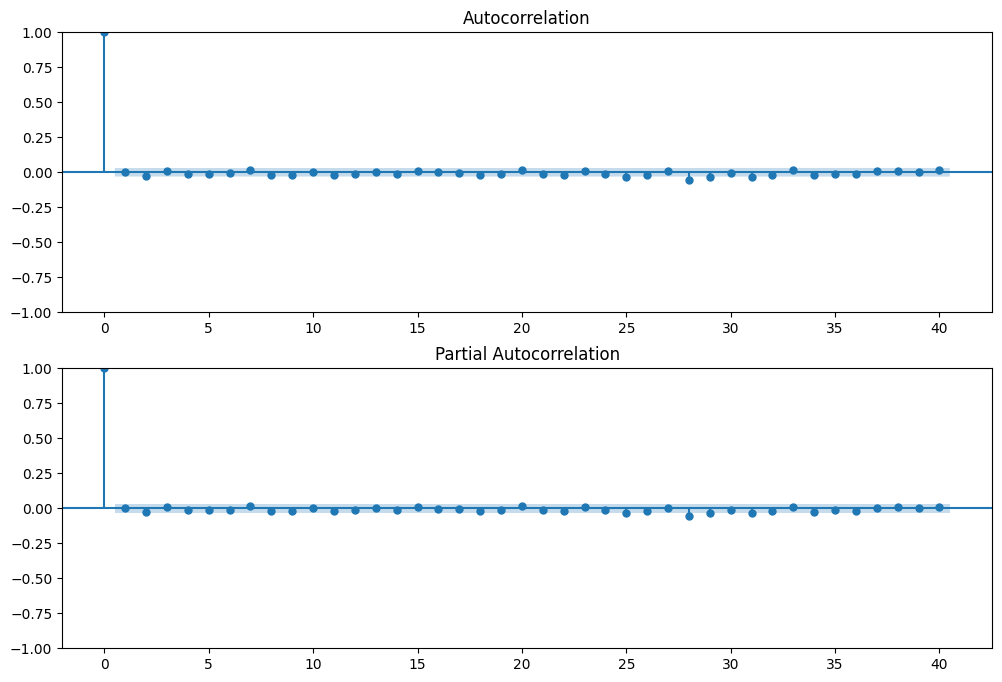

In [8]:
# Import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ACF and PACF Plots for TCS
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_tcs['Close_diff'].dropna(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_tcs['Close_diff'].dropna(), lags=40, ax=ax2)

plt.show()



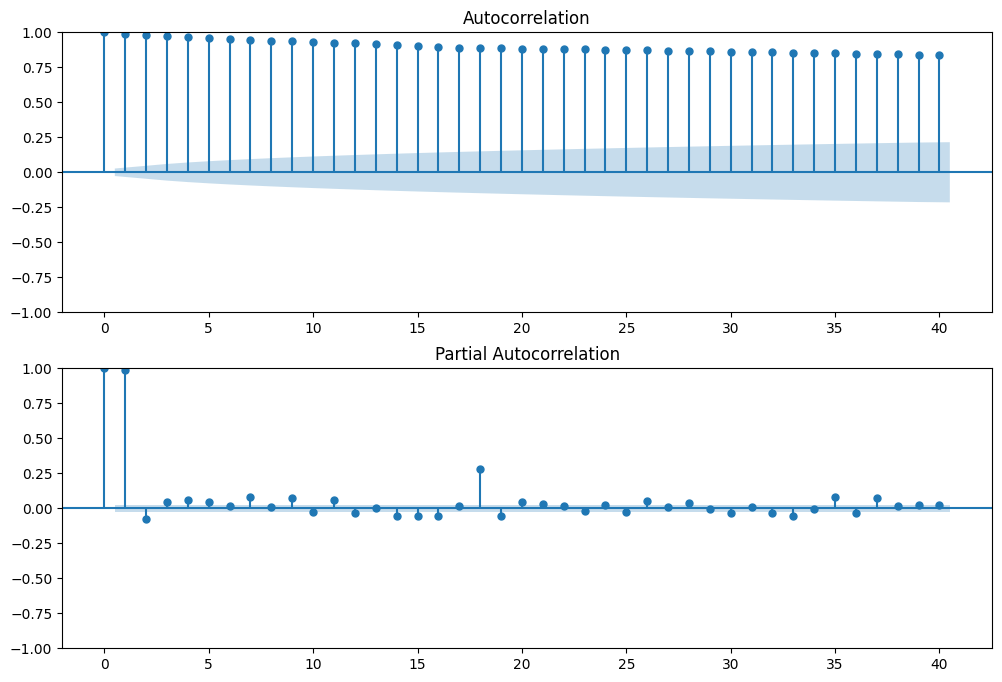

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig = plt.figure(figsize=(12,8))

# ACF Plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_infosys['Close'], lags=40, ax=ax1)

# PACF Plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_infosys['Close'], lags=40, ax=ax2)

# Show the plots
plt.show()


In [10]:
# Calculate training set size for TCS
train_size_tcs = int(len(df_tcs) * 0.8)

# Calculate training set size for Infosys
train_size_infosys = int(len(df_infosys) * 0.8)

# Split TCS data
train_tcs = df_tcs.iloc[:train_size_tcs].dropna()
test_tcs = df_tcs.iloc[train_size_tcs:].dropna()

# Split Infosys data
train_infosys = df_infosys.iloc[:train_size_infosys].dropna()
test_infosys = df_infosys.iloc[train_size_infosys:].dropna()

# Print dataset sizes
print(f"TCS     - Training Data: {len(train_tcs)} | Testing Data: {len(test_tcs)}")
print(f"Infosys - Training Data: {len(train_infosys)} | Testing Data: {len(test_infosys)}")


TCS     - Training Data: 3310 | Testing Data: 828
Infosys - Training Data: 4244 | Testing Data: 1062


In [11]:
# Convert train test data to business day frequency

train_tcs = train_tcs.asfreq('B')
test_tcs = test_tcs.asfreq('B')
